# TP 1 - Exercise 3 - Basile TERVER

In [422]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

If the data matrix $X:= \begin{pmatrix}x_1^\top \\ \vdots \\ x_n^\top  \end{pmatrix} \in \R^{n\times d}$ has full column rank (which requires $n\geq d$), the optimal solution to this minimization problem is explicitly given by 
$$
w_{*}:=(X^\top X)^{-1}X^\top y
$$
Yet, computing this optimal vector $w_{*}$ has $O(nd^2)$ time complexity.

The following stochastic gradient descent algorithm has complexity $O(k_{max}d)$, where $k_{max}$ is the number of allowed iterations.

Define $f:w\mapsto nR_n(w)= \sum_{i=1}^n (y_i-w^\top x_i)^2$. We minimize $f$, which has the same minima as $R_n$,
 with the following SGD algorithm.

We follow the setup and notations of Léon Bottou's "Stochastic Gradient Learning in Neural Networks" article from 1991.
 
1. **Initialize** : 
Set $w$ randomly in $[-1,1]$.
2. **Iterate** : Iterate for $t=1,\dots,t_{max}$ the following: 
 - Choose $i$ by sampling uniformly among $({1,\dots,n})$
 - Calculate the gradient : $\nabla_w f = 2 x_i (  \langle w, x_i\rangle-y_i)$
 - Subtract : $ w = w- \epsilon_t \nabla_w f$ 
 
3. **End** : Return $w$

Since our cost function $f$ is strongly convex, differentiable, Theorem 1 of Bottou's paper tells us that, if the following condition is satisfied, the algorithm converges to an optimal solution of the minimization problem:
-  $\sum \epsilon_t = \infty $, $\sum \epsilon_t^2 <\infty $

$\epsilon_t = 1/t$ satisfies this condition but most implementations of the algorithm take a constant learning rate $\epsilon$ small enough (empirical notion of "small enough"), like $\epsilon=0.01$ in what follows.

In [423]:

def SGD(data, epsilon=0.01, k_max= int(1e4), normalize=True):
    # Define the data and labels
    X, y = data
    #Set size and dimension of dataset
    n,d=X.shape
    print('dimension of data =',d)
    print('dataset size =',n)
    # Snitialize w randomly in [-1,1]
    w = 2 * np.random.rand(d) - 1
    if normalize:
        w = w / np.linalg.norm(w)
    for k in range(k_max):
        i = np.random.randint(0, n) # Sample a data point
        grad = 2 * (w.T@X[i] - y[i]) * X[i]  # Compute gradient at this point
        w -= epsilon* grad  # Update w
        if normalize:
            w = w / np.linalg.norm(w)
    return w

In [424]:
def dataset(X, Y):
    """Scatter plot of data, with color and marker per class"""
    labels = np.unique(Y.astype(int))
    print('labels are',labels)
    markers = ['o', '+']
    colors = ['r', 'g']
    for i,label in enumerate(labels):
        # indexes of data points corresponding to each label
        idxes = np.where(Y==label)[0]
        plt.scatter(X[idxes, 0], X[idxes, 1], marker=markers[i], color=colors[i], label=f'label {label}')

# Question 2

### Define dataset
We generate a vector $\bar{w}$ with components in $[-1,1]$ because our SGD algorithm, since we use normalization, outputs an estimated vector $w_{*}$ with components in $[-1,1]$ and we will compute in question 3 the distance between $\bar{w}$ and $w_{*}$.

In [425]:
#Set size and dimension of dataset
n = 500
d=2
plot_offset = 0.1
#Generate random dataset in [-1,1]^2
X = 2 * np.random.rand(n, d) - 1
w_bar = 2*np.random.rand(d) -1
# Compute labels explicitly
Y = np.sign(np.dot(X, w_bar.T))



### Plot dataset with hyperplane

labels are [-1  1]


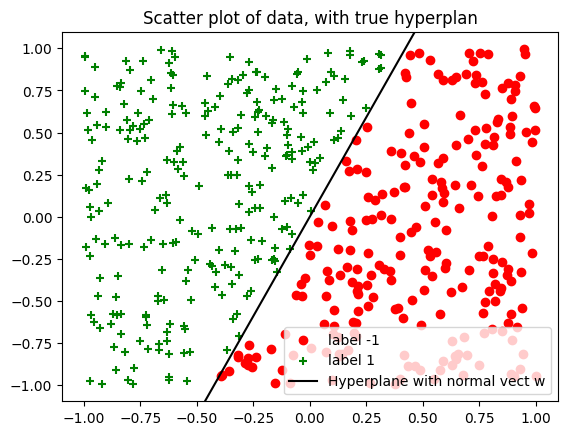

In [426]:
dataset(X, Y)

abscissa_lim = np.array([X[:,0].min(), X[:,0].max()])
ordinate_lim = np.array([X[:,1].min()-plot_offset, X[:,1].max()+plot_offset])
#plot line having direction vector the rotation of w of angle pi/2
plt.plot(abscissa_lim, (-w_bar[0]/w_bar[1])*abscissa_lim, 'k-', label = 'Hyperplane with normal vect w')
plt.legend()
plt.title('Scatter plot of data, with true hyperplan')
plt.ylim(ordinate_lim);

# Question 3

### Use SGD to estimate hyperplane on dataset (X,Y) defined previously

In [427]:
w_sgd = SGD((X,Y))

dimension of data = 2
dataset size = 500


labels are [-1  1]
Euclidean distance between estimated and true line:  0.05984207202325498


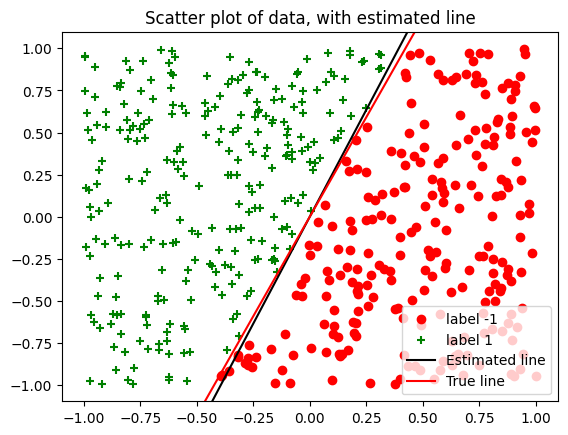

In [428]:
#scatter plot of the dataset with true hyperplane
dataset(X, Y)

#Add on that plot the esimated and true hyperplane
plt.plot(abscissa_lim, (-w_sgd[0]/w_sgd[1])*abscissa_lim, 'k-', label = 'Estimated line')
plt.plot(abscissa_lim, (-w_bar[0]/w_bar[1])*abscissa_lim, 'r-', label = 'True line')

plt.legend()
plt.title('Scatter plot of data, with estimated line')
plt.ylim(ordinate_lim);
print("Euclidean distance between estimated and true line: ", np.linalg.norm(w_bar-w_sgd))

The stochastic gradient descent algorithm with learning rate $\epsilon=0.01$ and number of iterations $k_{max}=10 000$  gives a satisfying approximation $w_{*}$ of the separating hyperplane $\bar{w}$. One could compute the precision and recall of our esimator but, from the plot, they seem to be good. 

# Question 4

In [429]:
def add_noise(X, eps=1e-1):
    """Add gaussian noise to the data"""
    return X + np.random.randn(X.shape[0], X.shape[1]) * eps

In [430]:
X_noise = add_noise(X)
# Compute labels explicitly
Y_noise = np.sign(np.dot(X_noise, w_bar.T))
w_star_noise = SGD((X_noise, Y_noise))

dimension of data = 2
dataset size = 500


labels are [-1  1]
Euclidean distance between w_bar and w_star_noise:  0.12709457039599212


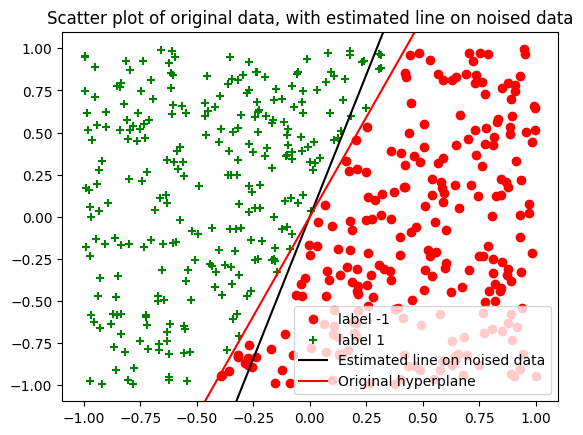

In [431]:
dataset(X, Y)

plt.plot(abscissa_lim, (-w_star_noise[0]/w_star_noise[1])*abscissa_lim, 'k-', label = 'Estimated line on noised data')
plt.plot(abscissa_lim, (-w_bar[0]/w_bar[1])*abscissa_lim, 'r-', label = 'Original hyperplane')
plt.legend()
plt.title('Scatter plot of original data, with estimated line on noised data')
plt.ylim(ordinate_lim);
print("Euclidean distance between w_bar and w_star_noise: ", np.linalg.norm(w_bar-w_star_noise))

We seem to have the same level of accuracy than in the previous question, that is the SGD algorithm seems to be robust to noise.
This is precisely the purpose the stochasticity of our algorithm, at the cost of being less precise than a pure gradient descent.

# Question 5

In [432]:
!pip install ucimlrepo

In [433]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Mon Jul 17 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53f0fbb42

In [434]:
# Replace labels with usual sign labels
y = y.replace(to_replace=['B','M'],value=[1,-1])

# Normalize data
X = X - X.mean(axis=0)
X /= X.std(axis=0)

Compute SGD estimator of the hyperplane separating the two classes

In [435]:
w_star_wisc = SGD((X.values,y.values))

dimension of data = 30
dataset size = 569


In [436]:
!pip install scikit-learn

Let us now visualise how our estimated line performs in the PCA (two first components) basis of this dataset

labels are [-1  1]


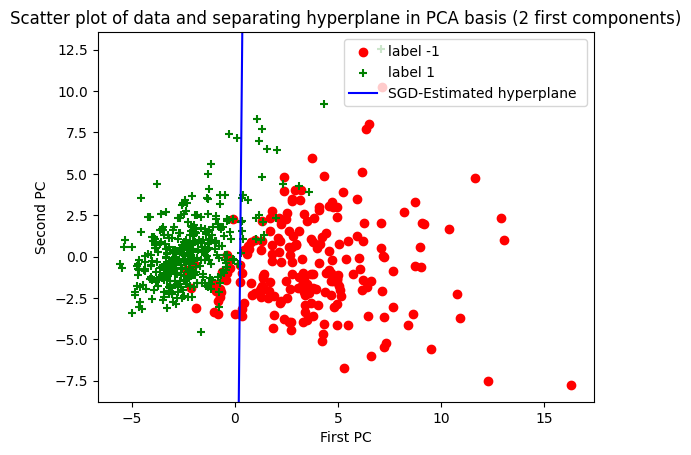

In [438]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X.values)

abscissa_lim = np.array([X_PCA[:,0].min(), X_PCA[:,0].max()])
ordinate_lim = np.array([X_PCA[:,1].min()-10*plot_offset, X_PCA[:,1].max()+10*plot_offset])


# Project estimated hyperplane in PCA basis
w_star_wisc_pca = pca.transform(w_star_wisc.reshape(1, -1))[0]

dataset(X_PCA,y)

#Plot separating hyperplane
plt.plot(w_star_wisc_pca[0]/w_star_wisc_pca[1]*abscissa_lim , c='b', label='SGD-Estimated hyperplane ')
plt.title("Scatter plot of data and separating hyperplane in PCA basis (2 first components)")
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.ylim(ordinate_lim);
plt.legend()
plt.show()

Along the two principal components, the estimate hyperplane is still satisfying, which confirms its robustness, even for a dataset in 30 dimensions.